In [52]:
def clear_vars(): # same as above, but jupyter's built-in
    %reset -f

import math
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import *
init_printing()

# 1 systems identification from step response

a (log decay factor):    0.6931
Damping ratio ζ:         0.2155
Natural frequency ω_n:   1.9498 rad/s
a1 = 2ζω_n:              0.8402
a0 = ω_n²:               3.8017

Differential equation:
y''(t) + 0.8402 y'(t) + 3.8017 y(t) = 3.8017 x(t)


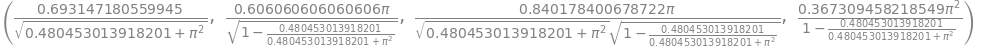

In [53]:
# all values have been eyballed from the step response graph
y_peak = 1.5  # peak value of the step response
y_final = 1.0 # final value of the step response (at infinity)
t_peak = 1.65 # time of peak (in seconds)

def percent_overshoot(y_peak, y_final, t_peak):
    # percent overshoot
    PO = ((y_peak - y_final) / y_final) * 100
    return PO

PO = percent_overshoot(y_peak, y_final, t_peak)
display(PO)

def identify_second_order_system(percent_overshoot, t_peak):
    # Step 1: Calculate 'a' from PO
    a = -log(percent_overshoot / 100)
    
    # Step 2: Damping ratio ζ
    zeta = a / sqrt(pi**2 + a**2)
    
    # Step 3: Natural frequency ω_n
    omega_n = pi / (t_peak * sqrt(1 - zeta**2))
    
    # Step 4: Coefficients for differential equation
    a1 = 2 * zeta * omega_n
    a0 = omega_n**2

    # Print results
    print(f"a (log decay factor):    {a:.4f}")
    print(f"Damping ratio ζ:         {zeta:.4f}")
    print(f"Natural frequency ω_n:   {omega_n:.4f} rad/s")
    print(f"a1 = 2ζω_n:              {a1:.4f}")
    print(f"a0 = ω_n²:               {a0:.4f}")
    
    print("\nDifferential equation:")
    print(f"y''(t) + {a1:.4f} y'(t) + {a0:.4f} y(t) = {a0:.4f} x(t)")
    
    return zeta, omega_n, a1, a0

identify_second_order_system(PO, t_peak) # t_peak = 0.5 seconds

a (log decay factor):    0.6931
Damping ratio ζ:         0.2155
Natural frequency ω_n:   1.9498 rad/s
a1 = 2ζω_n:              0.8402
a0 = ω_n²:               3.8017

Differential equation:
y''(t) + 0.8402 y'(t) + 3.8017 y(t) = 3.8017 x(t)


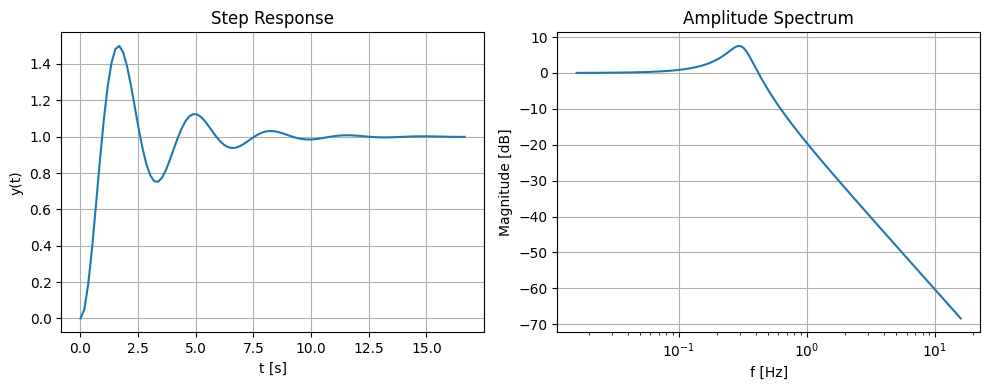

In [54]:
zeta, omega_n, a1, a0 = identify_second_order_system(PO, t_peak)

# Transfer function: H(s) = omega_n^2 / (s^2 + 2*zeta*omega_n*s + omega_n^2)
num = [a0]          # numerator = omega_n^2
den = [1, a1, a0]   # denominator = s^2 + a1*s + a0

system = signal.TransferFunction([float(a0)], [1.0, float(a1), float(a0)])

# STEP RESPONSE
t, y = signal.step(system)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y, label="Step response")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.title("Step Response")
plt.grid(True)

# FREQUENCY RESPONSE
w = np.logspace(-1, 2, 500)  # frequencies from 0.1 to 100 rad/s
w, mag, phase = signal.bode(system, w)

plt.subplot(1, 2, 2)
plt.semilogx(w/(2*np.pi), mag)  # Convert rad/s to Hz
plt.xlabel("f [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title("Amplitude Spectrum")
plt.grid(True)

plt.tight_layout()
plt.show()

# 2 systems identification from step response (case 2)

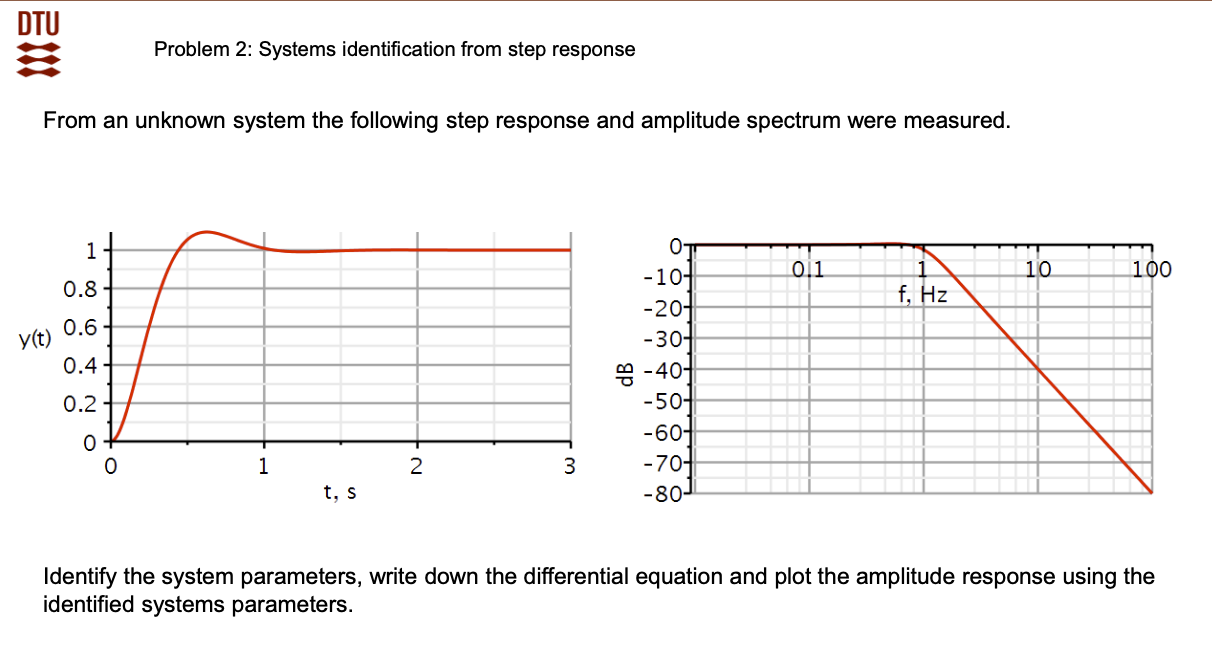

a (log decay factor):    2.3539
Damping ratio ζ:         0.5996
Natural frequency ω_n:   6.3831 rad/s
a1 = 2ζω_n:              7.6549
a0 = ω_n²:               40.7439

Differential equation:
y''(t) + 7.6549 y'(t) + 40.7439 y(t) = 40.7439 x(t)


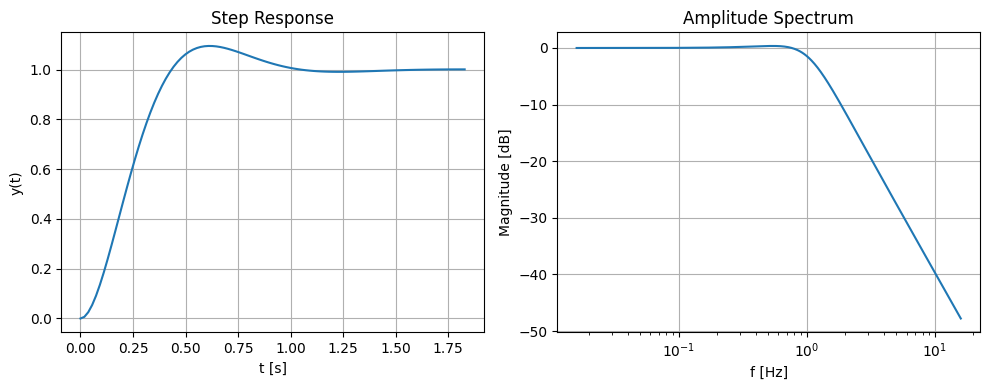

In [55]:
# Eyeballed values
y_peak = 1.095
y_final = 1.0
t_peak = 0.615

PO = percent_overshoot(y_peak, y_final, t_peak)
display(PO)

zeta, omega_n, a1, a0 = identify_second_order_system(PO, t_peak)


# Transfer function: H(s) = omega_n^2 / (s^2 + 2*zeta*omega_n*s + omega_n^2)
num = [a0]          # numerator = omega_n^2
den = [1, a1, a0]   # denominator = s^2 + a1*s + a0

system = signal.TransferFunction([float(a0)], [1.0, float(a1), float(a0)])


# STEP RESPONSE
t, y = signal.step(system)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y, label="Step response")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.title("Step Response")
plt.grid(True)

# FREQUENCY RESPONSE
w = np.logspace(-1, 2, 500)  # frequencies from 0.1 to 100 rad/s
w, mag, phase = signal.bode(system, w)

plt.subplot(1, 2, 2)
plt.semilogx(w/(2*np.pi), mag)  # Convert rad/s to Hz
plt.xlabel("f [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title("Amplitude Spectrum")
plt.grid(True)

plt.tight_layout()
plt.show()

# 3 (graphical) effects of moving poles

##  3.1

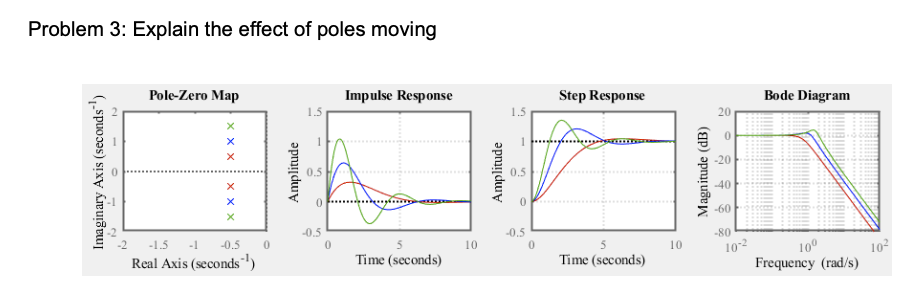

Pole-zero map (increasing imaginary part)

* Pole behavior: Real parts are constant, imaginary parts increase from Red < Blue < Green.

&nbsp;

*Impulse Response:*

Red (low imaginary part) → lower frequency

* Slower oscillations

* longer settling time

* underdamped response


Green (high imaginary part) → higher frequency

* Faster oscillations

* shorter settling time

* overdamped response

&nbsp;

*Step Response:*

* Red: Slower rise, less overshoot.

* Green: Faster rise, greater overshoot, more pronounced ringing.

&nbsp;

*Bode plot:*

* Red :Bode peak occurs at lower frequency

* Green : Bode peak shifts right (resonance at higher frequency)

&nbsp;

---

📌 Summary: Higher imaginary part = higher frequency oscillations and more resonant behavior.

In [56]:
# values eyballed from pole-zero map for the green poles
real_part = -0.5      # Real part of the pole
imaginary_part = 1.5  # Imaginary part of the pole

# Calculate the damped natural frequency (omega_d)
omega_d = abs(imaginary_part)

# Calculate the damping ratio (zeta)
zeta = abs(real_part) / math.sqrt(real_part**2 + imaginary_part**2)

# Output the results
print(f"Damped natural frequency (omega_d): {omega_d} rad/s")
print(f"Damping ratio (zeta): {zeta}")

# Calculate the peak amplitude (before scaling)
initial_amplitude = 1 / (omega_d * np.sqrt(1 - zeta**2))
print(initial_amplitude)

t = np.linspace(0, 10, 1000)
# impulse responses without normalization (like in the graph)
h_t = initial_amplitude * np.exp(real_part * t) * np.sin(omega_d * t)
print(np.mean(h_t))
print(np.max(h_t))

Damped natural frequency (omega_d): 1.5 rad/s
Damping ratio (zeta): 0.31622776601683794
0.7027283689263066
0.04227628198704992
0.43963165266799004


##  3.2

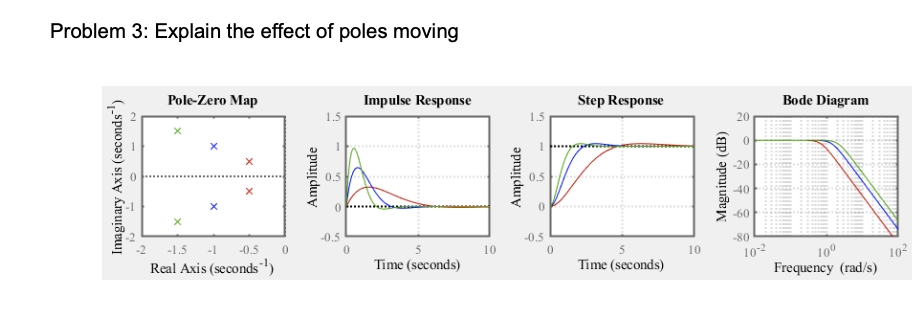

Pole-zero map (increasing imaginary part decreasing real part)

* Pole behavior: Real parts decrease, imaginary parts increase from Red -> Blue -> Green.

&nbsp;

*Impulse Response:*

Red (low imaginary part) → lower frequency ; (highest real part) → less damping (higher signal in theory)

* Slower oscillations

* longer settling time

* underdamped response ( frequency has more say than damping factor ? )


Green (high imaginary part) → higher frequency ; (lowest real part) → more damping (lower signal in theory)

* Faster oscillations

* shorter settling time

* still underdamped response, but less ( frequency has more say than damping factor ? )

&nbsp;

*Step Response:*

Red (low imag., high real → less damping):

* Slower rise (due to low frequency)

* More overshoot (due to low damping)

* Longer settling time

* Gentle ringing

Green (high imag., low real → more damping):

* Faster rise (due to higher frequency)

* Less overshoot (due to higher damping)

* Faster settling

* Tighter ringing, quickly damped

&nbsp;

*Bode plot:*

* Red :Bode peak occurs at lower frequency

* Green : Bode peak shifts right (resonance at higher frequency)

&nbsp;

---

📌 So: Overshoot is not a function of frequency, but of damping.
High frequency ≠ more overshoot — unless damping is also low.


In [57]:
# values eyballed from pole-zero map for the green poles
real_part = -1.5      # Real part of the pole
imaginary_part = 1.5  # Imaginary part of the pole

# Calculate the damped natural frequency (omega_d)
omega_d = abs(imaginary_part)

# Calculate the damping ratio (zeta)
zeta = abs(real_part) / math.sqrt(real_part**2 + imaginary_part**2)

# Output the results
print(f"Damped natural frequency (omega_d): {omega_d} rad/s")
print(f"Damping ratio (zeta): {zeta}")

# Calculate the peak amplitude (before scaling)
initial_amplitude = 1 / (omega_d * np.sqrt(1 - zeta**2))
print(initial_amplitude)

t = np.linspace(0, 10, 1000)
# impulse responses without normalization (like in the graph)
h_t = initial_amplitude * np.exp(real_part * t) * np.sin(omega_d * t)
print(np.mean(h_t))
print(np.max(h_t))

Damped natural frequency (omega_d): 1.5 rad/s
Damping ratio (zeta): 0.7071067811865476
0.9428090415820635
0.031394362546495254
0.30395225140429843


## 3.3

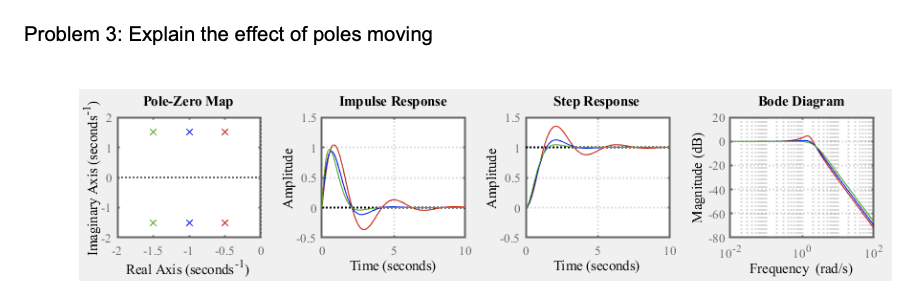

Pole-zero map (constant imaginary part decreasing real part)

* Pole behavior: Real parts decrease from Red -> Blue -> Green.

&nbsp;

*Impulse Response:*

Red (highest real part) → less damping (higher signal in theory)

* least damping (oscillations keep their amplitude longer)

* longer settling time (sustained ringing)

* more overshoot

* underdamped response


Green (lowest real part) → more damping (lower signal in theory)

* most damping (oscillation amplitude decreses faster)

* faster settling time (minimal ringing)

* less overshoot

* still underdamped response (but less)

&nbsp;

*Step Response:*

Red (high real → less damping):

* Highest overshoot
 
* Slowest settling time
 
* Most pronounced ringing

Green (low real → more damping):

* Little to no overshoot

* Fast settling

* Light ringing

&nbsp;

*Bode plot:*

* Red :sharpest peak, highest peak magnitude, slightly narrow bandwidth

* Green : lowest peak, lowest peak magnitude, slightly broader bandwidth

&nbsp;

---

📌 Summary:
Same imaginary part → same oscillation frequency

More negative real part → more damping

Less damping → higher overshoot, slower decay, sharper resonance

More damping → lower overshoot, quicker settling, flatter frequency response


In [58]:
# values eyballed from pole-zero map for the green poles
real_part = -1.5      # Real part of the pole
imaginary_part = 1.5  # Imaginary part of the pole

# Calculate the damped natural frequency (omega_d)
omega_d = abs(imaginary_part)

# Calculate the damping ratio (zeta)
zeta = abs(real_part) / math.sqrt(real_part**2 + imaginary_part**2)

# Output the results
print(f"Damped natural frequency (omega_d): {omega_d} rad/s")
print(f"Damping ratio (zeta): {zeta}")

# Calculate the peak amplitude (before scaling)
initial_amplitude = 1 / (omega_d * np.sqrt(1 - zeta**2))
print(initial_amplitude)

t = np.linspace(0, 10, 1000)
# impulse responses without normalization (like in the graph)
h_t = initial_amplitude * np.exp(real_part * t) * np.sin(omega_d * t)
print(np.mean(h_t))
print(np.max(h_t))

Damped natural frequency (omega_d): 1.5 rad/s
Damping ratio (zeta): 0.7071067811865476
0.9428090415820635
0.031394362546495254
0.30395225140429843


# 4 Bode plots XXX (not sure how to do this one)

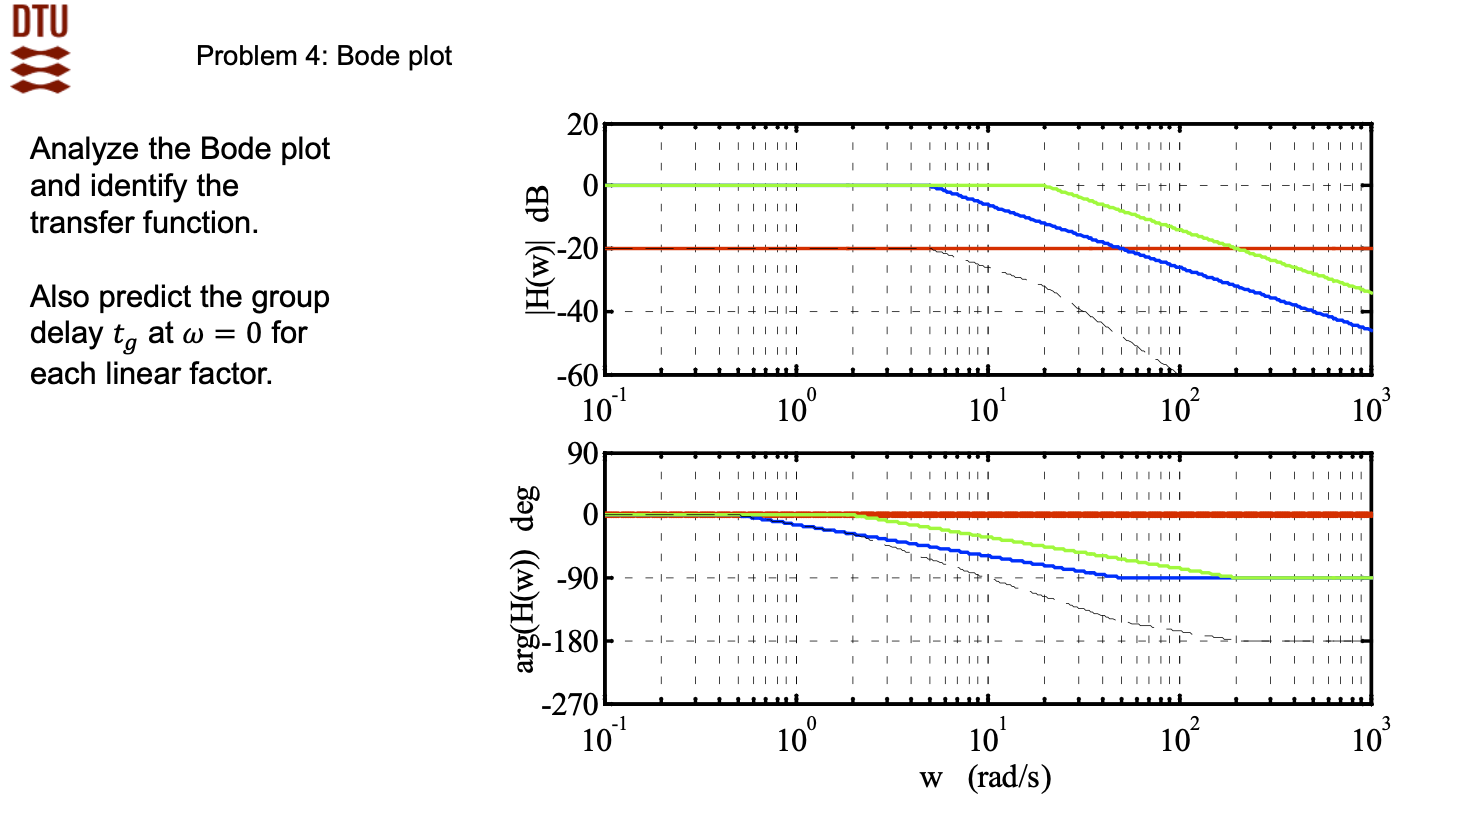

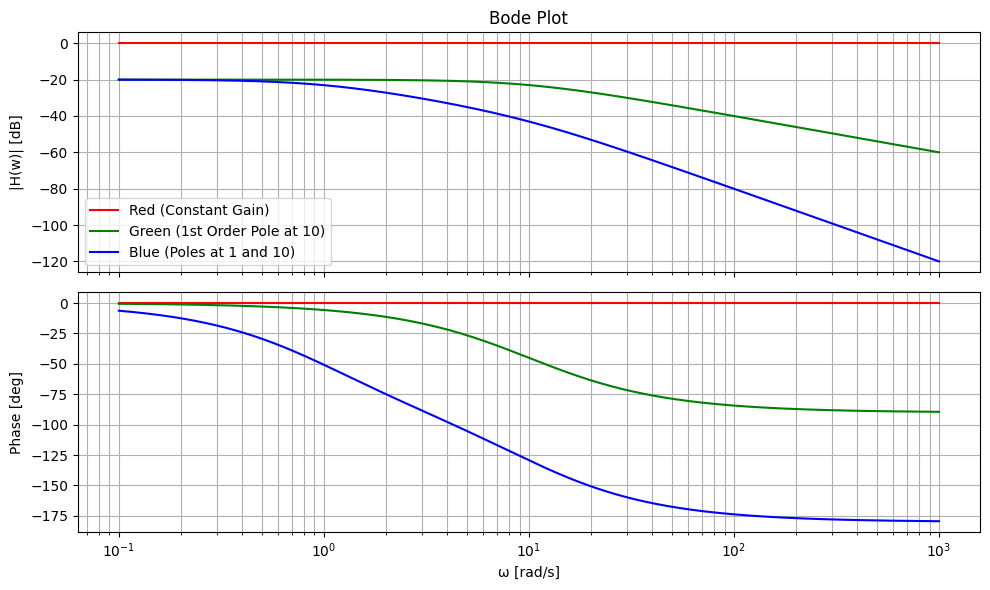

In [59]:
# TODO : is this correct?

# Define frequency range
w = np.logspace(-1, 3, 1000)

# Define systems
systems = {
    'Red (Constant Gain)': signal.TransferFunction([1], [1]),
    'Green (1st Order Pole at 10)': signal.TransferFunction([1], [1, 10]),
    'Blue (Poles at 1 and 10)': signal.TransferFunction([1], [1, 11, 10])  # (s+1)(s+10)
}

# Plot Bode plots
fig, (ax_mag, ax_phase) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

colors = {'Red (Constant Gain)': 'red', 'Green (1st Order Pole at 10)': 'green', 'Blue (Poles at 1 and 10)': 'blue'}

for label, sys in systems.items():
    w_out, mag, phase = signal.bode(sys, w)
    ax_mag.semilogx(w_out, mag, label=label, color=colors[label])
    ax_phase.semilogx(w_out, phase, label=label, color=colors[label])

ax_mag.set_title('Bode Plot')
ax_mag.set_ylabel('|H(w)| [dB]')
ax_mag.grid(True, which='both')

ax_phase.set_ylabel('Phase [deg]')
ax_phase.set_xlabel('ω [rad/s]')
ax_phase.grid(True, which='both')

ax_mag.legend()
plt.tight_layout()
plt.show()


# 5 Bode plots XXX (not sure how to do this one)

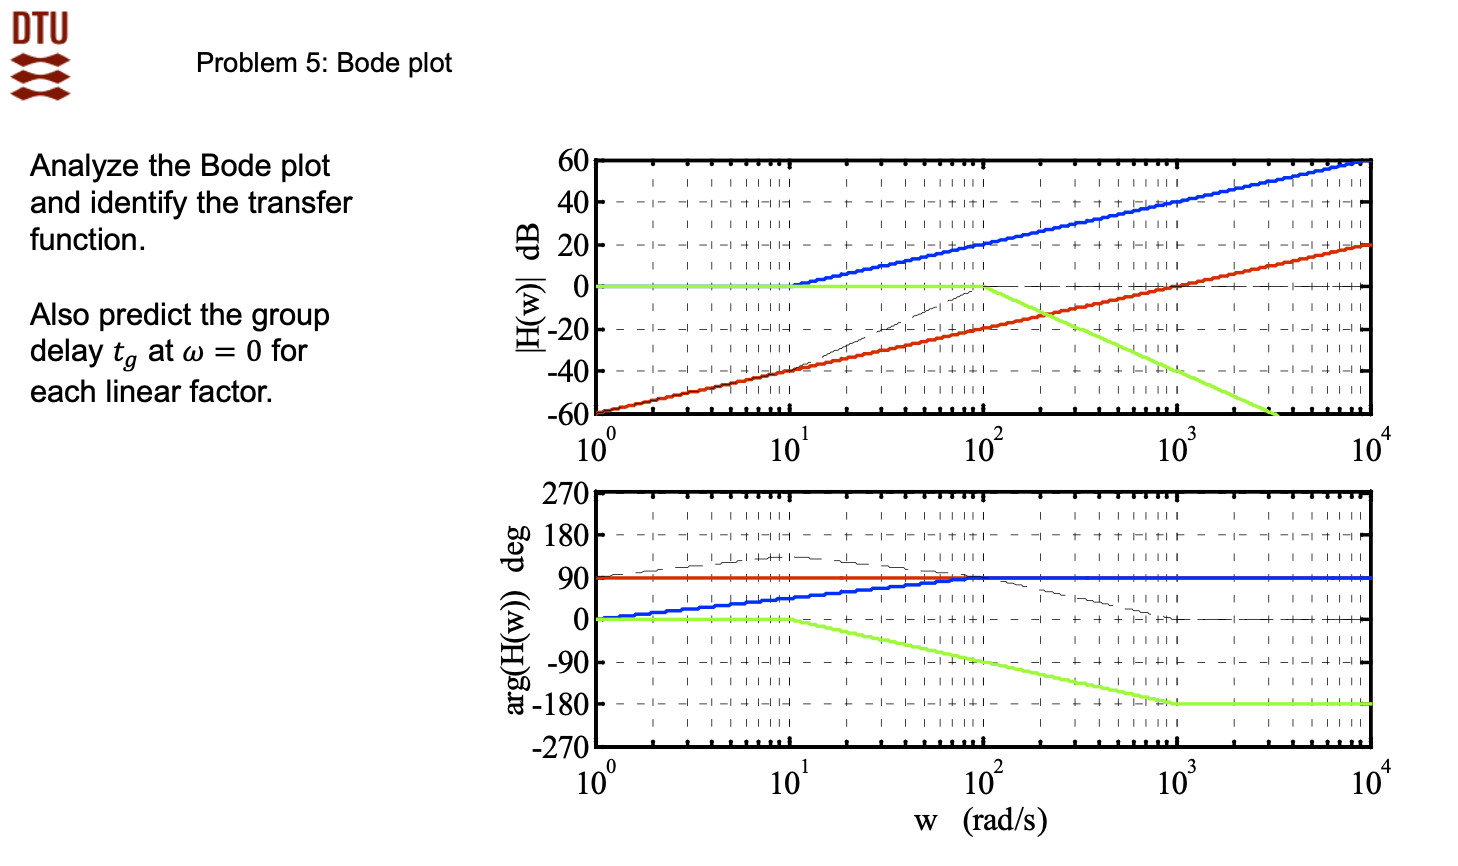